In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Background Field Compare

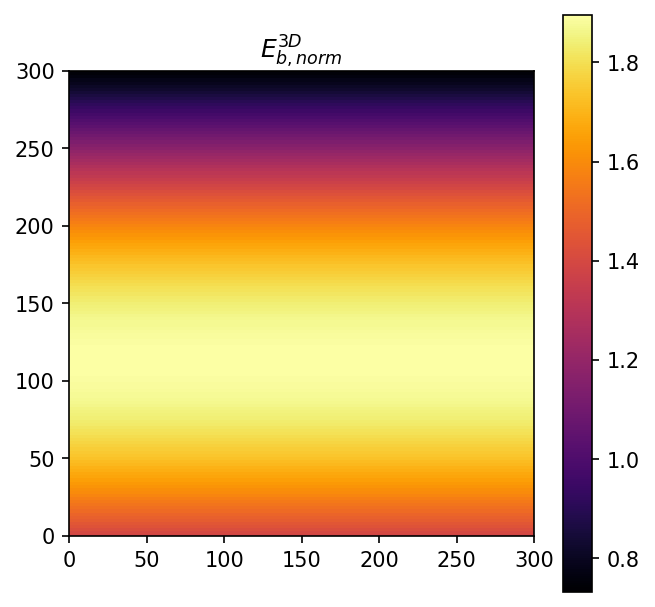

In [81]:
Field_3D = np.loadtxt('data/3D-au-background-field-XZ-r-1um.txt', skiprows=9, delimiter=',')

X = Field_3D[:,0]
Y = Field_3D[:,1]
Ebx3d = Field_3D[:,2] + 1j*Field_3D[:,3]
Eby3d = Field_3D[:,4] + 1j*Field_3D[:,5]
Ebz3d = Field_3D[:,6] + 1j*Field_3D[:,7]
Nx, Ny = len(np.unique(X)), len(np.unique(Y))

shape = (Nx, Ny)

XX,YY = np.reshape(X, shape), np.reshape(Y, shape)
Ebxx3d, Ebyy3d, Ebzz3d = np.reshape(Ebx3d, shape), np.reshape(Eby3d, shape), np.reshape(Ebz3d, shape)

normE_3D = np.sqrt(np.abs(Ebxx3d)**2+np.abs(Ebyy3d)**2 + np.abs(Ebzz3d)**2)


fig = plt.figure(figsize=(5, 5), dpi=150)
ax = plt.subplot(111)
ax.set_aspect('equal')
cmap = plt.colormaps['inferno']

field = ax.pcolormesh(XX, YY, normE_3D, cmap=cmap, shading='auto', edgecolors='none')
fig.colorbar(field)
# ax.grid()
ax.set_xlim(0,300)
ax.set_ylim(0,300)
ax.set_title('$E_{b,norm}^{3D}$')
plt.savefig('normEb3D-au.pdf', format="pdf", bbox_inches='tight')
plt.show()


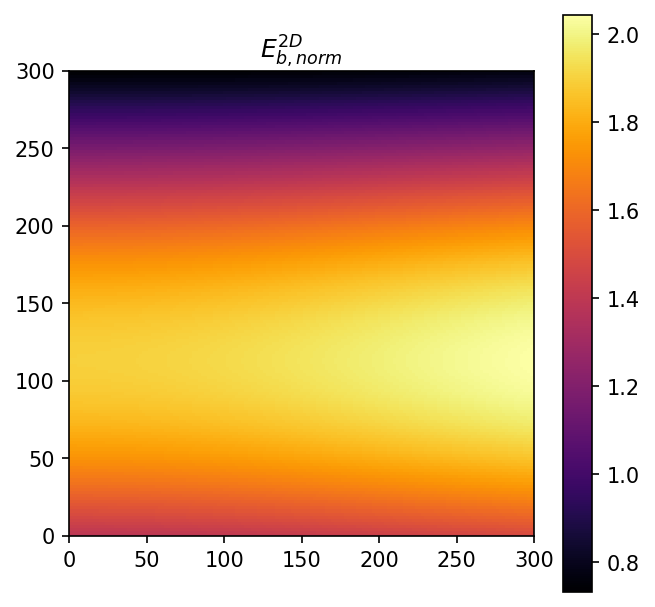

In [82]:
Field_2D = np.loadtxt('data/2D-au-background-field-XZ-r-1um.txt', skiprows=9, delimiter=',')

def get_field(a, M_max):
    size_r = len(a[:,0])
    E_r = np.zeros(size_r, dtype=complex)
    E_phi = np.zeros(size_r, dtype=complex)
    E_z = np.zeros(size_r, dtype=complex)

    for k in range(size_r):
        for i in range(2*M_max+1):
            E_r[k] += (a[k,2+6*i]  + 1j*a[k,3+6*i])
            E_phi[k] += (a[k,4+6*i]  + 1j*a[k,5+6*i])
            E_z[k] += (a[k,6+6*i]  + 1j*a[k,7+6*i])

    return E_r, E_phi, E_z

R = Field_2D[:,0]
Z = Field_2D[:,1]
phi = 0

Ebr, Ebphi, Ebz2d = get_field(Field_2D, 2)
Ebx2d = Ebr*np.cos(phi)-np.sin(phi)*Ebphi
Eby2d = Ebr*np.sin(phi)+np.cos(phi)*Ebphi

Nr, Nz = len(np.unique(R)), len(np.unique(R))

shape = (Nx, Ny)

Rr,Zz = np.reshape(R, shape), np.reshape(Z, shape)

Ebxx2d, Ebyy2d, Ebzz2d = np.reshape(Ebx2d, shape), np.reshape(Eby2d, shape), np.reshape(Ebz2d, shape)

normE_2D = np.sqrt(np.abs(Ebxx2d)**2+np.abs(Ebyy2d)**2 + np.abs(Ebzz2d)**2)


fig = plt.figure(figsize=(5, 5), dpi=150)
ax = plt.subplot(111)
ax.set_aspect('equal')
cmap = plt.colormaps['inferno']

field = ax.pcolormesh(Rr, Zz, normE_2D, cmap=cmap, shading='auto', edgecolors='none')
fig.colorbar(field)
# ax.grid()
ax.set_xlim(0,300)
ax.set_ylim(0,300)
ax.set_title('$E_{b,norm}^{2D}$')
plt.savefig('normEb2D-au.pdf', format="pdf", bbox_inches='tight')
plt.show()


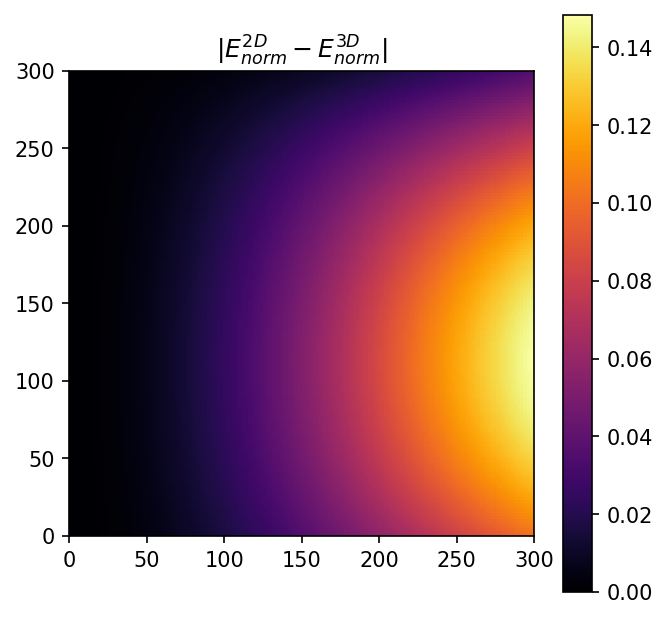

In [83]:

fig = plt.figure(figsize=(5, 5), dpi=150)
ax = plt.subplot(111)
ax.set_aspect('equal')
cmap = plt.colormaps['inferno']

field = ax.pcolormesh(XX, YY, np.abs(normE_2D-normE_3D), cmap=cmap, shading='auto', edgecolors='none')
fig.colorbar(field)
# ax.grid()
ax.set_xlim(0,300)
ax.set_ylim(0,300)
ax.set_title('$|E_{norm}^{2D} - E_{norm}^{3D}|$')
plt.savefig('normEb3D-normEb2D-au.pdf', format="pdf", bbox_inches='tight')
plt.show()

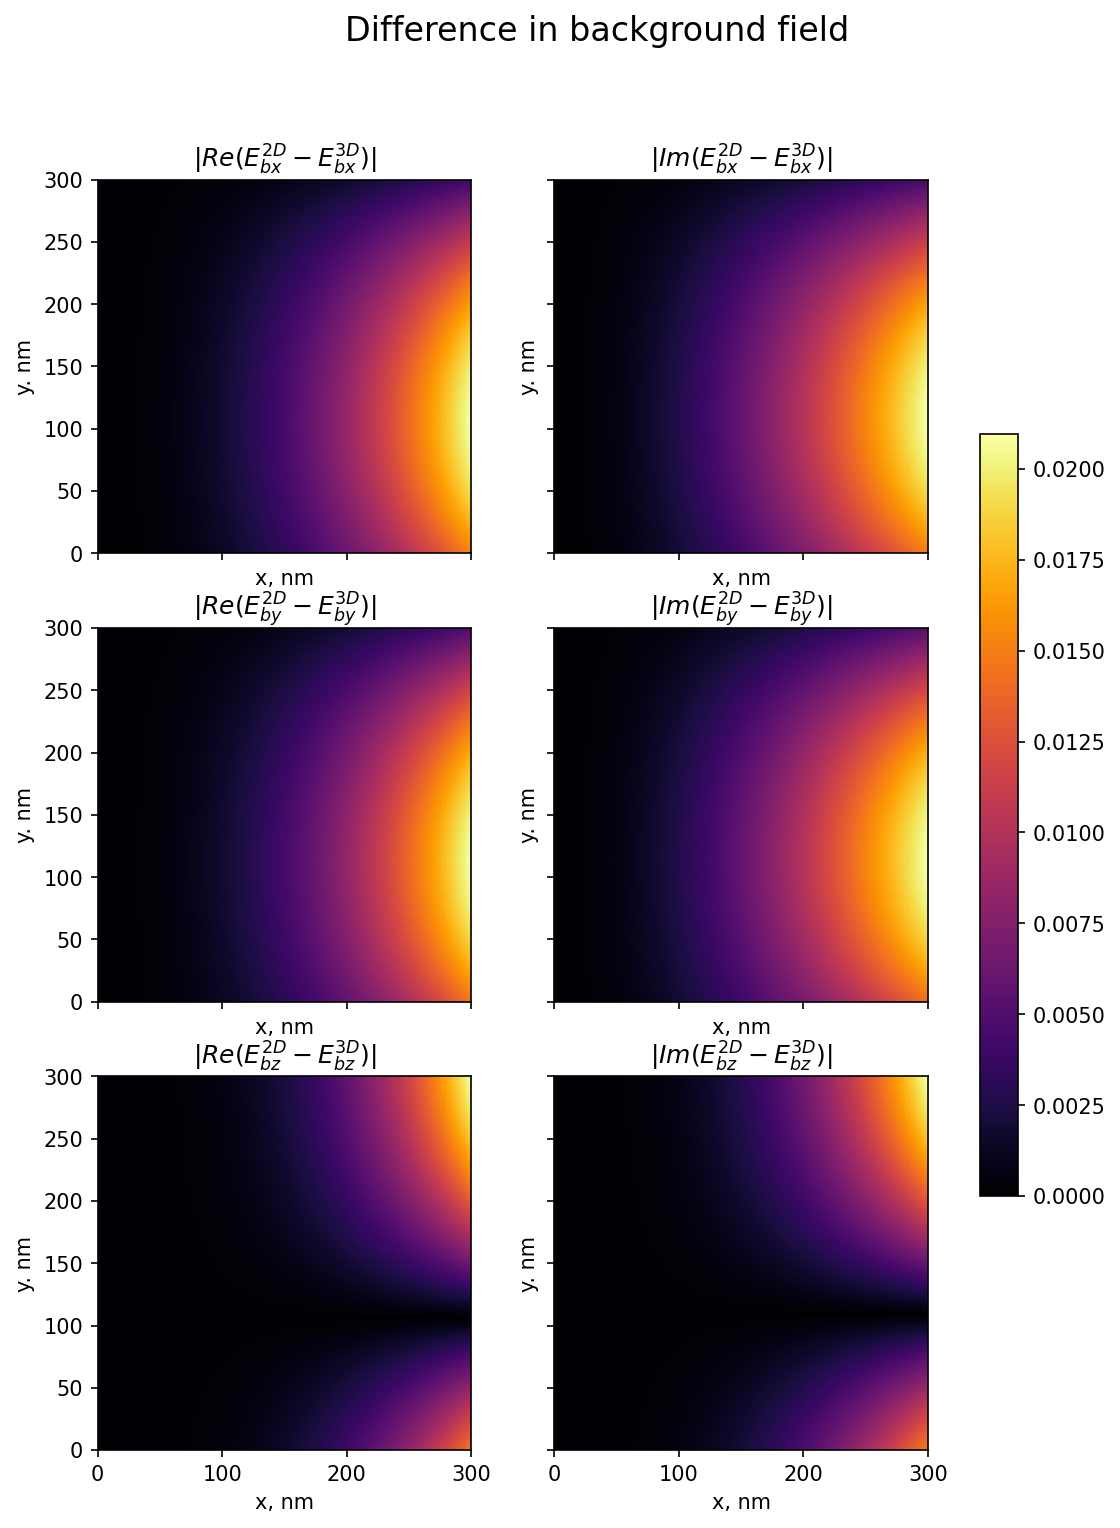

In [84]:
fig, axes = plt.subplots(3,2, dpi=150, sharex=True, sharey=True, figsize=(9,11))

Data = [[np.real(Ebxx2d)-np.real(Ebxx3d), np.imag(Ebxx2d)-np.imag(Ebxx3d)], 
        [np.real(Ebyy2d)-np.real(Ebyy3d), np.imag(Ebyy2d)-np.imag(Ebyy3d)], 
        [np.real(Ebzz2d)-np.real(Ebzz3d),  np.imag(Ebzz2d)-np.imag(Ebzz3d)] ]
Titles = [['$|Re(E_{bx}^{2D} - E_{bx}^{3D})|$', '$|Im(E_{bx}^{2D} - E_{bx}^{3D})|$'],
          ['$|Re(E_{by}^{2D} - E_{by}^{3D})|$', '$|Im(E_{by}^{2D} - E_{by}^{3D})|$'],
          ['$|Re(E_{bz}^{2D} - E_{bz}^{3D})|$', '$|Im(E_{bz}^{2D} - E_{bz}^{3D})|$']]
cmap = plt.colormaps['inferno']

for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        field = ax.pcolor(XX, YY, np.abs(Data[i][j]), cmap=cmap, shading='auto', edgecolors='none')
        ax.set_title(Titles[i][j])
        ax.set_aspect('equal')
        ax.set_xlim(0,300)
        ax.set_ylim(0,300)
        ax.set_xlabel('x, nm')
        ax.set_ylabel('y. nm')


fig.colorbar(field,  ax=axes.ravel().tolist(), shrink=0.6)

fig.suptitle('Difference in background field', fontsize=16)

plt.savefig('background_field_compare-au.pdf', format="pdf", bbox_inches='tight')

plt.show()

# Relative Field Compare


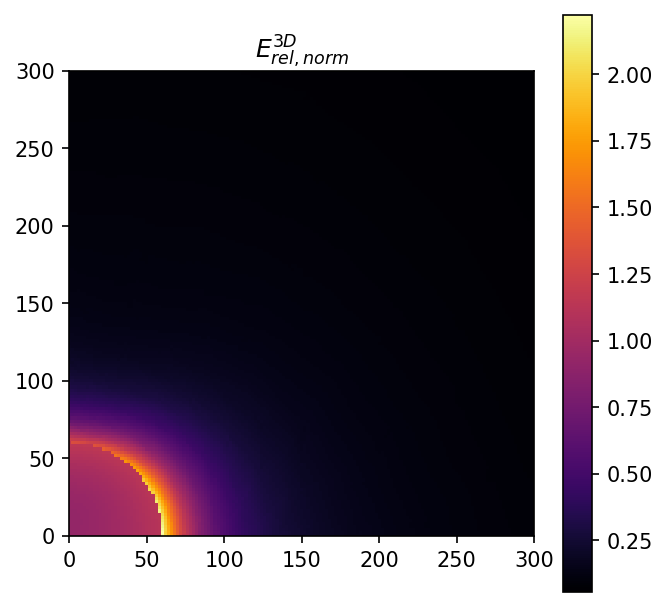

In [90]:
Field_3D_rel = np.loadtxt('data/3D-au-rel-field-XZ-r-1um.txt', skiprows=9, delimiter=',')

X = Field_3D_rel[:,0]
Y = Field_3D_rel[:,1]
Ebx3d_rel = Field_3D_rel[:,2] + 1j*Field_3D_rel[:,3]
Eby3d_rel = Field_3D_rel[:,4] + 1j*Field_3D_rel[:,5]
Ebz3d_rel = Field_3D_rel[:,6] + 1j*Field_3D_rel[:,7]
Nx, Ny = len(np.unique(X)), len(np.unique(Y))

shape = (Nx, Ny)

XX,YY = np.reshape(X, shape), np.reshape(Y, shape)
Ebxx3d_rel, Ebyy3d_rel, Ebzz3d_rel = np.reshape(Ebx3d_rel, shape), np.reshape(Eby3d_rel, shape), np.reshape(Ebz3d_rel, shape)

normE_3D_rel = np.sqrt(np.abs(Ebxx3d_rel)**2+np.abs(Ebyy3d_rel)**2 + np.abs(Ebzz3d_rel)**2)


fig = plt.figure(figsize=(5, 5), dpi=150)
ax = plt.subplot(111)
ax.set_aspect('equal')
cmap = plt.colormaps['inferno']

field = ax.pcolormesh(XX, YY, normE_3D_rel, cmap=cmap, shading='auto', edgecolors='none')
fig.colorbar(field)
# ax.grid()
ax.set_xlim(0,300)
ax.set_ylim(0,300)
ax.set_title('$E_{rel,norm}^{3D}$')
plt.savefig('relE3D-au.pdf', format="pdf", bbox_inches='tight')
plt.show()


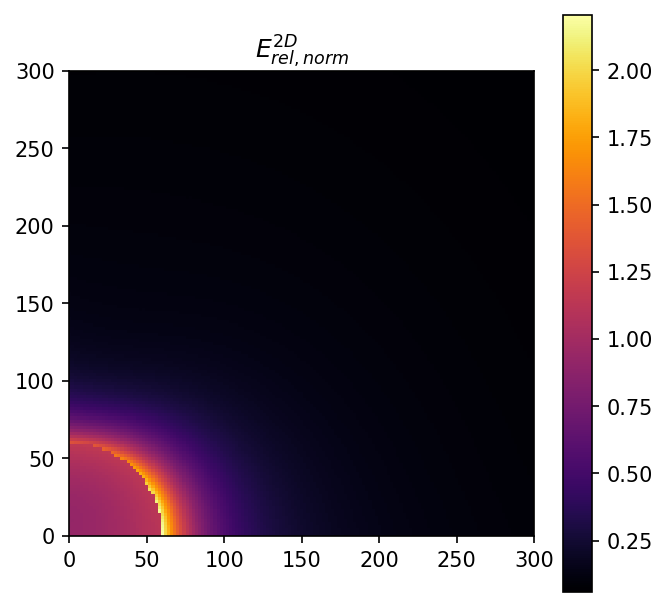

In [91]:
Field_2D_rel = np.loadtxt('data/2D-au-rel-field-XZ-r-1um.txt', skiprows=9, delimiter=',')

R = Field_2D_rel[:,0]
Z = Field_2D_rel[:,1]
phi = 0

Ebr_rel, Ebphi_rel, Ebz2d_rel = get_field(Field_2D_rel, 2)
Ebx2d_rel = Ebr_rel*np.cos(phi)-np.sin(phi)*Ebphi_rel
Eby2d_rel = Ebr_rel*np.sin(phi)+np.cos(phi)*Ebphi_rel

Nr, Nz = len(np.unique(R)), len(np.unique(R))

shape = (Nx, Ny)

Rr,Zz = np.reshape(R, shape), np.reshape(Z, shape)

Ebxx2d_rel, Ebyy2d_rel, Ebzz2d_rel = np.reshape(Ebx2d_rel, shape), np.reshape(Eby2d_rel, shape), np.reshape(Ebz2d_rel, shape)

normE_2D_rel = np.sqrt(np.abs(Ebxx2d_rel)**2+np.abs(Ebyy2d_rel)**2 + np.abs(Ebzz2d_rel)**2)


fig = plt.figure(figsize=(5, 5), dpi=150)
ax = plt.subplot(111)
ax.set_aspect('equal')
cmap = plt.colormaps['inferno']

field = ax.pcolormesh(Rr, Zz, normE_2D_rel, cmap=cmap, shading='auto', edgecolors='none')
fig.colorbar(field)
# ax.grid()
ax.set_xlim(0,300)
ax.set_ylim(0,300)
ax.set_title('$E_{rel,norm}^{2D}$')
plt.savefig('relE2D-au.pdf', format="pdf", bbox_inches='tight')
plt.show()


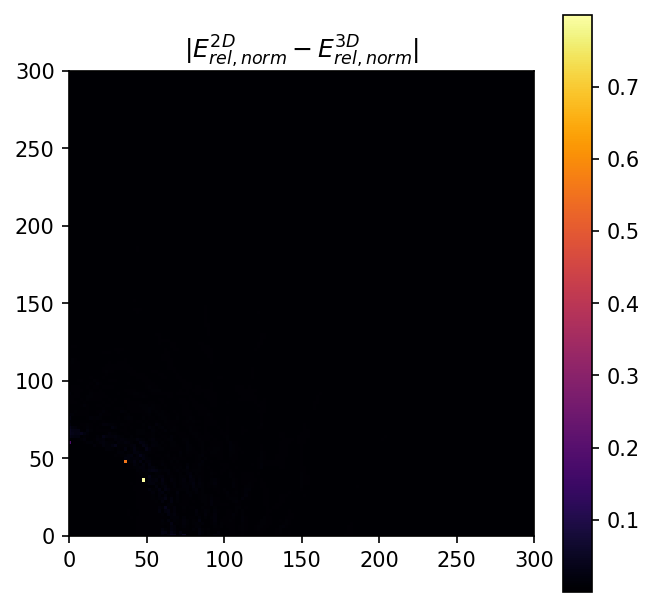

In [92]:

fig = plt.figure(figsize=(5, 5), dpi=150)
ax = plt.subplot(111)
ax.set_aspect('equal')
cmap = plt.colormaps['inferno']

field = ax.pcolormesh(XX, YY, np.abs(normE_2D_rel-normE_3D_rel), cmap=cmap, shading='auto', edgecolors='none')
fig.colorbar(field)
# ax.grid()
ax.set_xlim(0,300)
ax.set_ylim(0,300)
ax.set_title('$|E_{rel,norm}^{2D} - E_{rel,norm}^{3D}|$')
plt.savefig('relE3D-relE2D-au.pdf', format="pdf", bbox_inches='tight')
plt.show()

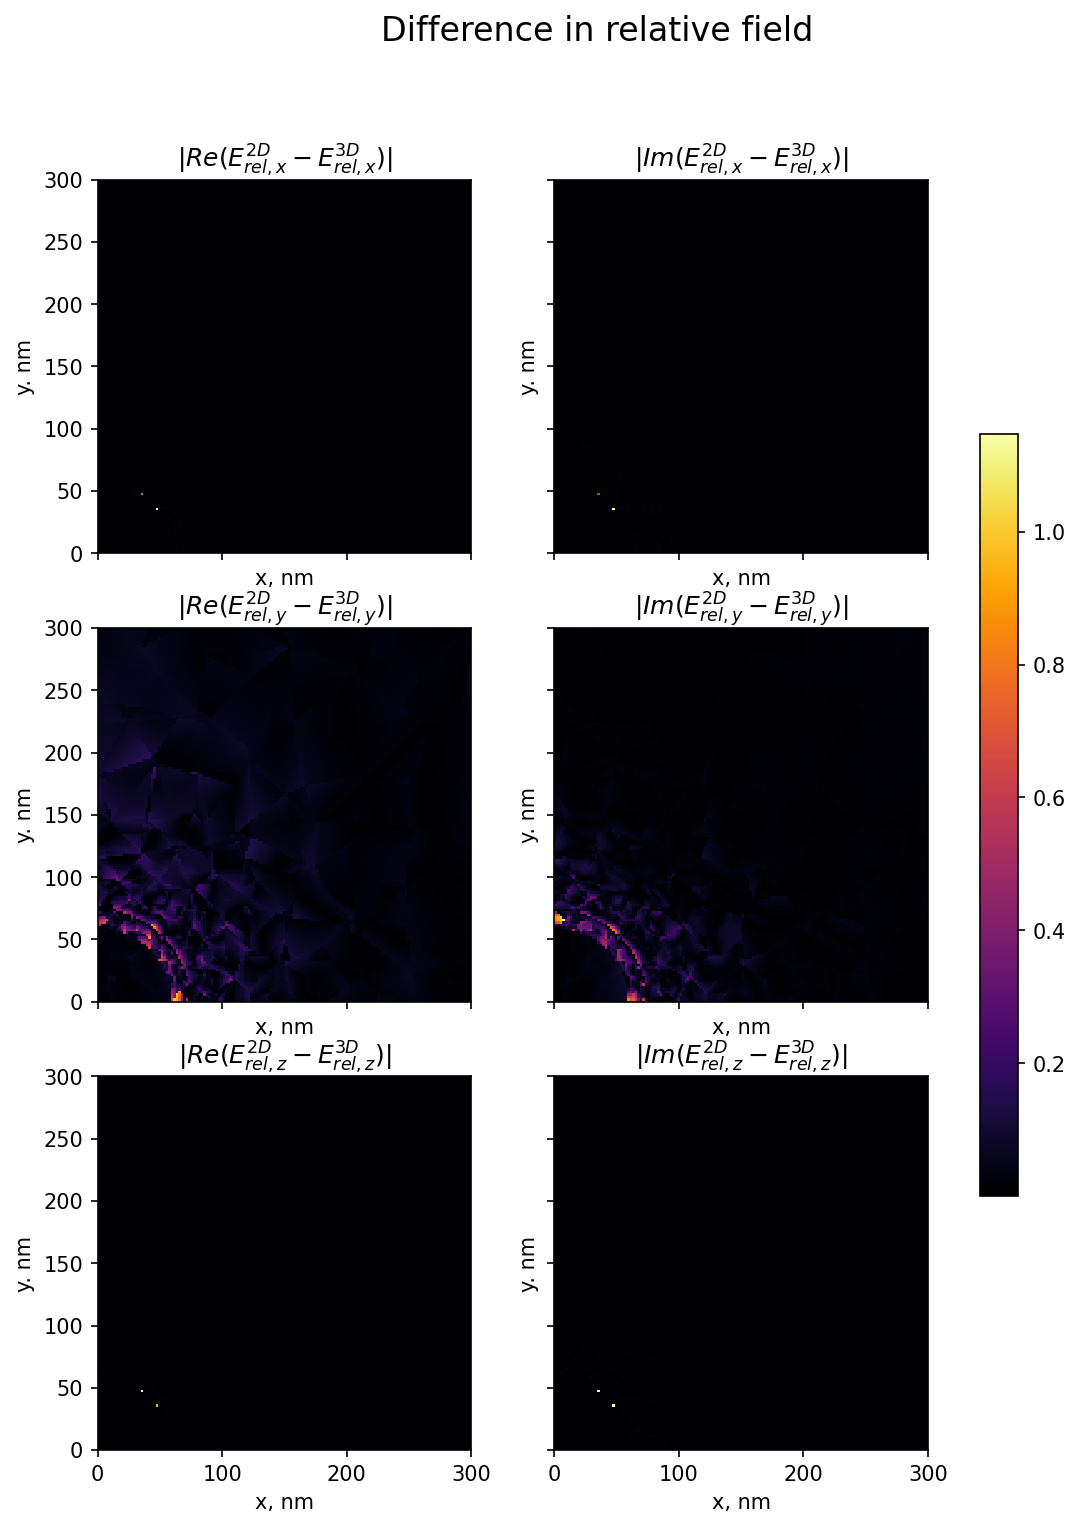

: 

In [ ]:
fig, axes = plt.subplots(3,2, dpi=150, sharex=True, sharey=True, figsize=(9,11))

Data = [[np.real(Ebxx2d_rel)-np.real(Ebxx3d_rel), np.imag(Ebxx2d_rel)-np.imag(Ebxx3d_rel)], 
        [np.real(Ebyy2d_rel)-np.real(Ebyy3d_rel), np.imag(Ebyy2d_rel)-np.imag(Ebyy3d_rel)], 
        [np.real(Ebzz2d_rel)-np.real(Ebzz3d_rel),  np.imag(Ebzz2d_rel)-np.imag(Ebzz3d_rel)] ]
Titles = [['$|Re(E_{rel,x}^{2D} - E_{rel,x}^{3D})|$', '$|Im(E_{rel,x}^{2D} - E_{rel,x}^{3D})|$'],
          ['$|Re(E_{rel,y}^{2D} - E_{rel,y}^{3D})|$', '$|Im(E_{rel,y}^{2D} - E_{rel,y}^{3D})|$'],
          ['$|Re(E_{rel,z}^{2D} - E_{rel,z}^{3D})|$', '$|Im(E_{rel,z}^{2D} - E_{rel,z}^{3D})|$']]
cmap = plt.colormaps['inferno']

for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        field = ax.pcolor(XX, YY, np.abs(Data[i][j]), cmap=cmap, shading='auto', edgecolors='none')
        ax.set_title(Titles[i][j])
        ax.set_aspect('equal')
        ax.set_xlim(0,300)
        ax.set_ylim(0,300)
        ax.set_xlabel('x, nm')
        ax.set_ylabel('y. nm')


fig.colorbar(field,  ax=axes.ravel().tolist(), shrink=0.6)

fig.suptitle('Difference in relative field', fontsize=16)
plt.savefig('relative_field_compare-au.pdf', format="pdf", bbox_inches='tight')
plt.show()